# Tips about Catalyst

## Conservation laws
We can use conservation laws to eliminate dependent variables. For example, in the chemical reaction `A + B <--> C`, given the initial concentrations of A, B, and C, the solver only needs to solve one state variable (either [A], [B], or [C]) instead of all three of them.

In [1]:
using Catalyst
using ModelingToolkit
using DifferentialEquations
using Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [2]:
rn = @reaction_network begin
    (k₊, k₋), A + B <--> C
end

Model ##ReactionSystem#230
States (3):
  A(t)
  B(t)
  C(t)
Parameters (2):
  k₊
  k₋

initial condition and parameter values

In [3]:
setdefaults!(rn, [:A => 1.0, :B => 2.0, :C => 0.0, :k₊ => 1.0, :k₋ => 1.0])

Let's convert it to a system of ODEs, using the conservation laws to eliminate two species, leaving only one of them as the state variable.
The conserved quantities will be denoted as `Γ`s

In [4]:
osys = convert(ODESystem, rn; remove_conserved=true)

Model ##ReactionSystem#230 with 1 equations
States (1):
  A(t) [defaults to 1.0]
Parameters (4):
  k₊ [defaults to 1.0]
  k₋ [defaults to 1.0]
  Γ[1] [defaults to B(t) - A(t)]
  Γ[2] [defaults to A(t) + C(t)]

Only one state variable (unknown) need to be solved

In [5]:
states(osys)

1-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 A(t)

The other two are constrained by conserved quantities

In [6]:
observed(osys)

2-element Vector{Equation}:
 B(t) ~ A(t) + Γ[1]
 C(t) ~ -A(t) + Γ[2]

Sovle the problem

In [7]:
oprob = ODEProblem(osys, [], (0.0, 10.0), [])
sol = solve(oprob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 19-element Vector{Float64}:
  0.0
  0.06602162921791198
  0.16167383514940023
  0.27797397728231527
  0.42472764714958433
  0.5991542008073268
  0.806924987304333
  1.0494129109373167
  1.3328284483921817
  1.6634552255095154
  2.052354280551443
  2.51461964424769
  3.0739849393485086
  3.766873869915106
  4.652565149690627
  5.82158524460386
  7.328825431370989
  8.975283356512563
 10.0
u: 19-element Vector{Vector{Float64}}:
 [1.0]
 [0.8836569748526829]
 [0.7588242800084224]
 [0.6540331524462982]
 [0.568130275406471]
 [0.506241910029968]
 [0.4646188739534168]
 [0.43937915010976675]
 [0.4254491990515147]
 [0.4186148724766697]
 [0.4156790087773819]
 [0.4146117645991656]
 [0.41429729907489854]
 [0.41422703877811756]
 [0.4142160588498569]
 [0.41421529338508184]
 [0.4142196830873377]
 [0.4142521296528476]
 [0.41422623069433284]

You can still trace the eliminated variable

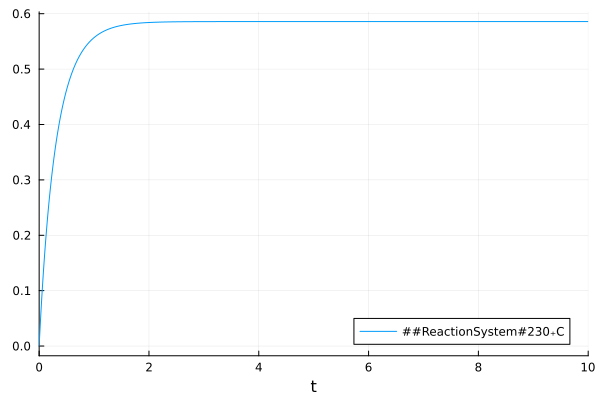

In [8]:
plot(sol, idxs=osys.C)